In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 4s 0us/step


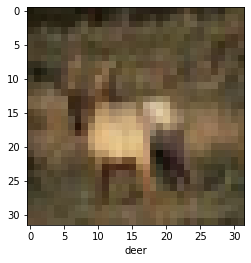

In [3]:
ind = 3
plt.imshow(X_train[ind], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[ind][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5252 - accuracy: 0.4426 - val_loss: 1.2298 - val_accuracy: 0.5609
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1409 - accuracy: 0.5966 - val_loss: 1.0628 - val_accuracy: 0.6294
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9993 - accuracy: 0.6504 - val_loss: 1.0289 - val_accuracy: 0.6415
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9095 - accuracy: 0.6824 - val_loss: 0.9243 - val_accuracy: 0.6781
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8365 - accuracy: 0.7080 - val_loss: 0.9194 - val_accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7878 - accuracy: 0.7229 - val_loss: 0.8883 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7347 - accuracy: 0.7402 - val_loss: 0.8634 - val_accuracy:

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.8651 - accuracy: 0.7208


# Image augmentation

In [11]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [0]:
test_img = X_train[1]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

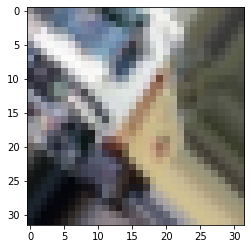

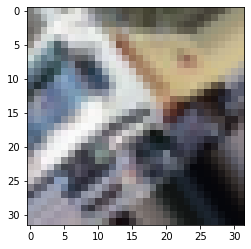

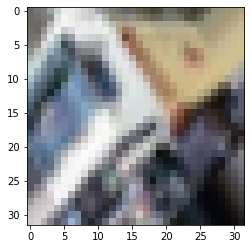

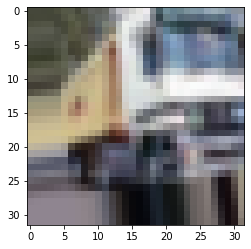

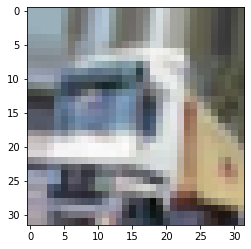

In [14]:
i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

# Pretranined

In [0]:
import os, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

In [16]:
import tensorflow_datasets as tfds

(raw_train, raw_validation, raw_test), metadata = tfds.load('cats_vs_dogs',split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], 
                                                 with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete6ZP6EW/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


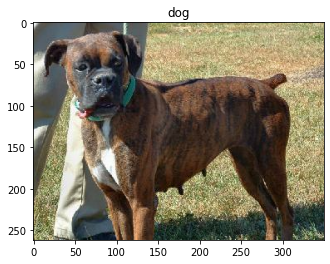

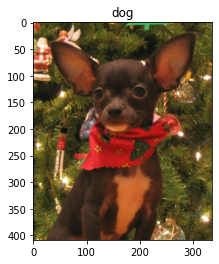

In [17]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [0]:
img_size = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) -1 
  image = tf.image.resize(image, (img_size, img_size))
  return image, label

In [0]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

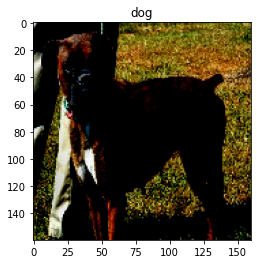

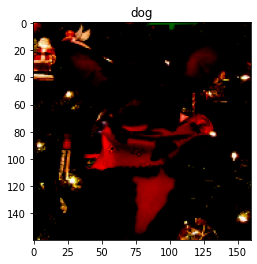

In [20]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [0]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [22]:
for img, label in raw_train.take(2):
  print("Original: ", img.shape)

for img, label in train.take(2):
  print("New: ",img.shape)

Original:  (262, 350, 3)
Original:  (409, 336, 3)
New:  (160, 160, 3)
New:  (160, 160, 3)


In [23]:
img_shape = (img_size, img_size, 3)

base_model = keras.applications.MobileNetV2(input_shape=img_shape,
                                            include_top=False,
                                            weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [24]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
base_model.trainable = False

In [26]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
model = keras.Sequential( [
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1) ] )

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
base_learning_rate = 0.0001
model.compile(optimizer=keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
validation_steps=20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 1s 53ms/step - loss: 0.8093 - accuracy: 0.5141


In [33]:
initial_epochs = 6
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)
acc = history.history['accuracy'] 
print(acc)

Epoch 1/6
582/582 [==============================] - 44s 75ms/step - loss: 0.0415 - accuracy: 0.9846 - val_loss: 0.0460 - val_accuracy: 0.9845
Epoch 2/6
582/582 [==============================] - 43s 74ms/step - loss: 0.0407 - accuracy: 0.9847 - val_loss: 0.0456 - val_accuracy: 0.9850
Epoch 3/6
582/582 [==============================] - 44s 76ms/step - loss: 0.0399 - accuracy: 0.9847 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 4/6
582/582 [==============================] - 43s 74ms/step - loss: 0.0392 - accuracy: 0.9847 - val_loss: 0.0448 - val_accuracy: 0.9850
Epoch 5/6
582/582 [==============================] - 44s 76ms/step - loss: 0.0386 - accuracy: 0.9851 - val_loss: 0.0446 - val_accuracy: 0.9845
Epoch 6/6
582/582 [==============================] - 44s 75ms/step - loss: 0.0381 - accuracy: 0.9853 - val_loss: 0.0444 - val_accuracy: 0.9845
[0.9845781922340393, 0.984739363193512, 0.984739363193512, 0.984739363193512, 0.9851155281066895, 0.9853304624557495]


In [0]:
model.save("dogs_cats.h5")
new_model = keras.models.load_model("dogs_cats.h5")

In [35]:
new_model.predict(test_batches)

array([[-8.620367 ],
       [ 2.9856312],
       [ 5.3032403],
       ...,
       [-9.507952 ],
       [ 8.02766  ],
       [-9.186402 ]], dtype=float32)